# **Importing Libraries**

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report

# **Reading Dataset**

In [206]:
train = pd.read_csv('fraudTrain.csv')
test = pd.read_csv('fraudTest.csv')

In [207]:
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [208]:
test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# **Data Understanding**

In [209]:
train.shape

(705283, 23)

In [210]:
test.shape

(555719, 23)

In [211]:
train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,705283.000000,7.052830e+05,705283.000000,705283.000000,705283.000000,705283.000000,7.052830e+05,7.052820e+05,705282.000000,705282.000000,705282.000000
mean,352641.000000,4.168253e+17,70.280604,48781.157457,38.536767,-90.217383,8.906212e+04,1.339198e+09,38.536622,-90.217813,0.005945
std,203597.809289,1.308403e+18,158.731679,26903.887747,5.073595,13.762224,3.028013e+05,7.103266e+06,5.107833,13.774119,0.076875
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.671242,0.000000
25%,176320.500000,1.800365e+14,9.640000,26237.000000,34.668900,-96.798000,7.430000e+02,1.333322e+09,34.739968,-96.888677,0.000000
50%,352641.000000,3.520550e+15,47.390000,48174.000000,39.354300,-87.461600,2.456000e+03,1.339697e+09,39.367114,-87.427377,0.000000
75%,528961.500000,4.642255e+15,83.050000,72011.000000,41.940400,-80.158000,2.047800e+04,1.345084e+09,41.955100,-80.219141,0.000000
max,705282.000000,4.992346e+18,26544.120000,99783.000000,66.693300,-67.950300,2.906700e+06,1.351385e+09,67.510267,-66.956540,1.000000


In [212]:
test.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [213]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705283 entries, 0 to 705282
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             705283 non-null  int64  
 1   trans_date_trans_time  705283 non-null  object 
 2   cc_num                 705283 non-null  int64  
 3   merchant               705283 non-null  object 
 4   category               705283 non-null  object 
 5   amt                    705283 non-null  float64
 6   first                  705283 non-null  object 
 7   last                   705283 non-null  object 
 8   gender                 705283 non-null  object 
 9   street                 705283 non-null  object 
 10  city                   705283 non-null  object 
 11  state                  705283 non-null  object 
 12  zip                    705283 non-null  int64  
 13  lat                    705283 non-null  float64
 14  long                   705283 non-nu

In [214]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [215]:
train.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


# **Removing Null Values**

In [216]:
null_mask = train.isnull().any(axis=1)
null_rows = train[null_mask]
print(null_rows)

        Unnamed: 0 trans_date_trans_time            cc_num  ... merch_lat merch_long  is_fraud
705282      705282   2019-10-28 00:40:15  4302480582202074  ...       NaN        NaN       NaN

[1 rows x 23 columns]


In [217]:
train.dropna(subset=['merch_long'], inplace=True)

In [218]:
train.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [219]:
train['trans_date_trans_time']=pd.to_datetime(train['trans_date_trans_time'])
train['dob']=pd.to_datetime(train['dob'])
test['trans_date_trans_time']=pd.to_datetime(test['trans_date_trans_time'])
test['dob']=pd.to_datetime(test['dob'])

In [220]:
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [221]:
test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# **Data Visualization**

<ipython-input-222-be068ffab923>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.countplot(x='is_fraud', data=train, palette='pastel')


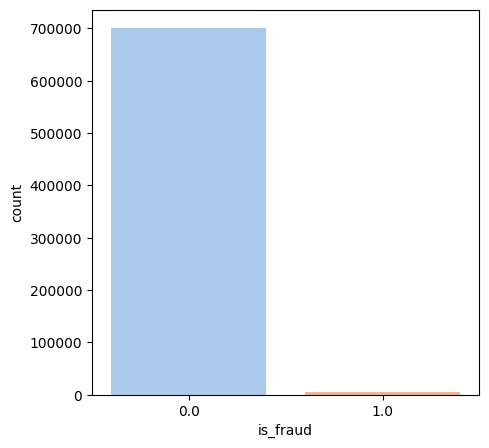

In [222]:
plt.figure(figsize=(5,5))
fig = sns.countplot(x='is_fraud', data=train, palette='pastel')
plt.show(fig)

In [223]:
fraud = train[train['is_fraud']==1]
fraud.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1.325466e+09,36.430124,-81.179483,1.0
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1.325469e+09,29.819364,-99.142791,1.0
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1.325474e+09,29.273085,-98.836360,1.0
2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1.325475e+09,35.909292,-82.091010,1.0
2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1.325477e+09,29.786426,-98.683410,1.0


In [224]:
normal=train[train['is_fraud']==0]
normal.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [225]:
fraud.shape

(4193, 23)

In [226]:
normal.shape

(701089, 23)

In [227]:
fraud['amt'].describe()

,amt
count,4193.000000
mean,525.994152
std,394.591006
min,1.180000
25%,137.860000
50%,374.460000
75%,901.990000
max,1371.810000


In [228]:
normal['amt'].describe()

,amt
count,701089.000000
mean,67.555170
std,152.203852
min,1.000000
25%,9.600000
50%,47.170000
75%,82.440000
max,26544.120000


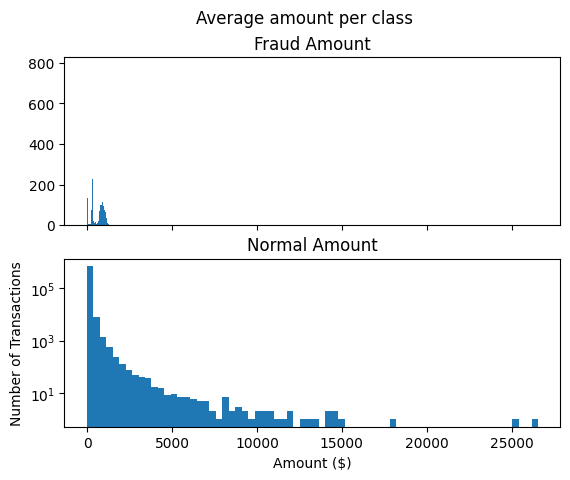

In [229]:
graph, (plot1, plot2) = plt.subplots(2,1,sharex = True)
graph.suptitle('Average amount per class')
bins = 70

plot1.hist(fraud['amt'],bins =  bins)
plot1.set_title('Fraud Amount')

plot2.hist(normal['amt'],bins =  bins)
plot2.set_title('Normal Amount')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

# **Data Preprocessing**

In [230]:
drop_col = ['Unnamed: 0','cc_num','trans_num','city','first','last','street',
            'zip','trans_date_trans_time','lat','long','merch_lat','dob',
            'unix_time','merch_long','state']
train = train.drop(drop_col, axis=1)
test = test.drop(drop_col, axis=1)

In [231]:
train.head()

,merchant,category,amt,gender,city_pop,job,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,3495,"Psychologist, counselling",0.0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,149,Special educational needs teacher,0.0
2,fraud_Lind-Buckridge,entertainment,220.11,M,4154,Nature conservation officer,0.0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,1939,Patent attorney,0.0
4,fraud_Keeling-Crist,misc_pos,41.96,M,99,Dance movement psychotherapist,0.0


In [232]:
test.head()

,merchant,category,amt,gender,city_pop,job,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,333497,Mechanical engineer,0
1,fraud_Sporer-Keebler,personal_care,29.84,F,302,"Sales professional, IT",0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,34496,"Librarian, public",0
3,fraud_Haley Group,misc_pos,60.05,M,54767,Set designer,0
4,fraud_Johnston-Casper,travel,3.19,M,1126,Furniture designer,0


# **Label Encoding**

In [233]:
encoder = LabelEncoder()

train['gender'] = encoder.fit_transform(train['gender'])
test['gender'] = encoder.fit_transform(test['gender'])

train['category'] = encoder.fit_transform(train['category'])
test['category'] = encoder.fit_transform(test['category'])

train['job'] = encoder.fit_transform(train['job'])
test['job'] = encoder.fit_transform(test['job'])

train['merchant'] = encoder.fit_transform(train['merchant'])
test['merchant'] = encoder.fit_transform(test['merchant'])

train['amt'] = train['amt'].astype(int)
test['amt'] = test['amt'].astype(int)

# **Model Splitting**

In [234]:
x_train = train.drop('is_fraud', axis=1)
y_train = train['is_fraud']

x_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

In [235]:
train.head()

,merchant,category,amt,gender,city_pop,job,is_fraud
0,514,8,4,0,3495,367,0.0
1,241,4,107,0,149,423,0.0
2,390,0,220,1,4154,304,0.0
3,360,2,45,1,1939,325,0.0
4,297,9,41,1,99,116,0.0


In [236]:
test.head()

,merchant,category,amt,gender,city_pop,job,is_fraud
0,319,10,2,1,333497,275,0
1,591,10,29,0,302,392,0
2,611,5,41,0,34496,259,0
3,222,9,60,1,54767,407,0
4,292,13,3,1,1126,196,0


# **Random Forest**

In [237]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [238]:
report = classification_report(y_test, y_pred)
print('Classification Report: ',report)

Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.75      0.58      0.66      2145

    accuracy                           1.00    555719
   macro avg       0.87      0.79      0.83    555719
weighted avg       1.00      1.00      1.00    555719



In [239]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9976318966959921


In [240]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[553150    424]
 [   892   1253]]


# **Decision Tree**

In [241]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
y_pred1 = dt.predict(x_test)

In [242]:
report = classification_report(y_test, y_pred1)
print('Classification Report: ',report)

Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.48      0.61      0.54      2145

    accuracy                           1.00    555719
   macro avg       0.74      0.80      0.77    555719
weighted avg       1.00      1.00      1.00    555719



In [243]:
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)

Accuracy: 0.9959367953947948


In [244]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)
print(cm)

[[552161   1413]
 [   845   1300]]
